In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv("/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv",encoding='latin-1')

In [3]:
a

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
a.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
a.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

**As we can see their are NA values in amount column we will replace it by mean of amount in that colum**

In [7]:
a['Amount']=a['Amount'].fillna(a['Amount'].mean())

In [8]:
a.drop(columns=['Status','unnamed1'],inplace=True)

In [9]:
a.isnull().sum()    # hence we have cleared all the null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

**Now we will try to reduce the size**

In [10]:
a['Gender']=a['Gender'].astype('category')

In [11]:
a['Amount'].unique()

array([23952., 23934., 23924., ...,   213.,   206.,   188.])

In [12]:
a['Amount']=a['Amount'].astype('int')

In [13]:
a['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [14]:
a['Zone']=a['Zone'].astype('category')

In [15]:
a.info()   #hence we have reduce the size by changing data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   User_ID           11251 non-null  int64   
 1   Cust_name         11251 non-null  object  
 2   Product_ID        11251 non-null  object  
 3   Gender            11251 non-null  category
 4   Age Group         11251 non-null  object  
 5   Age               11251 non-null  int64   
 6   Marital_Status    11251 non-null  int64   
 7   State             11251 non-null  object  
 8   Zone              11251 non-null  category
 9   Occupation        11251 non-null  object  
 10  Product_Category  11251 non-null  object  
 11  Orders            11251 non-null  int64   
 12  Amount            11251 non-null  int64   
dtypes: category(2), int64(5), object(6)
memory usage: 989.3+ KB


In [16]:
msk=a.duplicated()

In [17]:
a[msk]     # we don't have duplicates values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304


** give top customer names with highest order amount**

In [18]:
a.sort_values('Amount',ascending=False,ignore_index=True).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [19]:
a.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


We will create the new column

In [20]:
a['Marital_Status'].unique()

array([0, 1])

In [21]:
def Status_marriage(data):
    if data==0:
        return "Unmarried"
    else:
        return "Married"

In [22]:
a['Status_of_marriage']=a['Marital_Status'].apply(Status_marriage)

In [23]:
a.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status_of_marriage
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,Married


In [24]:
a.drop(columns='Marital_Status',inplace=True)

Now we will try to move the column

In [25]:
a.drop(columns='Status_of_marriage',axis=1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,Karnataka,Southern,Agriculture,Office,3,206


In [26]:
a.insert(loc=a.columns.get_loc('Age') + 1, column='Status_marriage', value=a['Status_of_marriage'])

In [27]:
a

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Status_marriage,State,Zone,Occupation,Product_Category,Orders,Amount,Status_of_marriage
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934,Married
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924,Married
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370,Married
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367,Unmarried
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213,Unmarried
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206,Unmarried


In [28]:
a.drop(columns='Status_of_marriage',inplace=True)

Now we will rank this on basis of higest amount done

In [29]:
a['Rank']=a['Amount'].rank(ascending=False,method='first')
a.sort_values('Rank')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Status_marriage,State,Zone,Occupation,Product_Category,Orders,Amount,Rank
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952,1.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934,2.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924,3.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912,4.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370,11247.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367,11248.0
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213,11249.0
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206,11250.0


Lets find out how many orders are their in Maharashtra state

In [30]:
mask=a['State']=='Maharashtra'

In [31]:
a[mask]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Status_marriage,State,Zone,Occupation,Product_Category,Orders,Amount,Rank
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952,1.0
7,1002092,Shivangi,P00273442,F,55+,61,Unmarried,Maharashtra,Western,IT Sector,Auto,1,9453,4676.0
33,1002638,Damala,P00346242,F,26-35,35,Married,Maharashtra,Western,Media,Auto,2,23306,31.0
60,1000379,Thais,P00121642,M,36-45,39,Unmarried,Maharashtra,Western,Healthcare,Stationery,3,21397,58.0
62,1001687,Bruce,P00265242,F,26-35,33,Unmarried,Maharashtra,Western,Govt,Stationery,4,21325,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11203,1000045,Byrd,P00205942,M,46-50,49,Married,Maharashtra,Western,IT Sector,Veterinary,3,732,11204.0
11223,1001542,Buch,P00113642,F,18-25,20,Married,Maharashtra,Western,Aviation,Office,4,574,11224.0
11233,1002106,Luke,P00164342,M,18-25,19,Unmarried,Maharashtra,Western,Agriculture,Office,1,563,11234.0
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370,11247.0


Text(0.5, 1.0, 'Count of M & F on Maritial_Status')

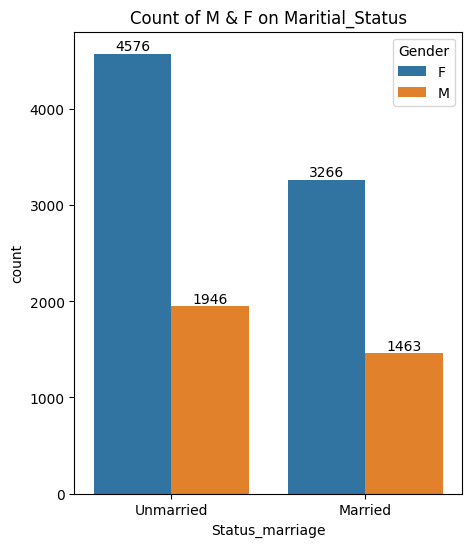

In [32]:
plt.figure(figsize=(5,6))
aa=sns.countplot(x='Status_marriage',hue='Gender',data=a)
for bars in aa.containers:
    aa.bar_label(bars)
plt.title('Count of M & F on Maritial_Status')

<Axes: xlabel='Zone', ylabel='Amount'>

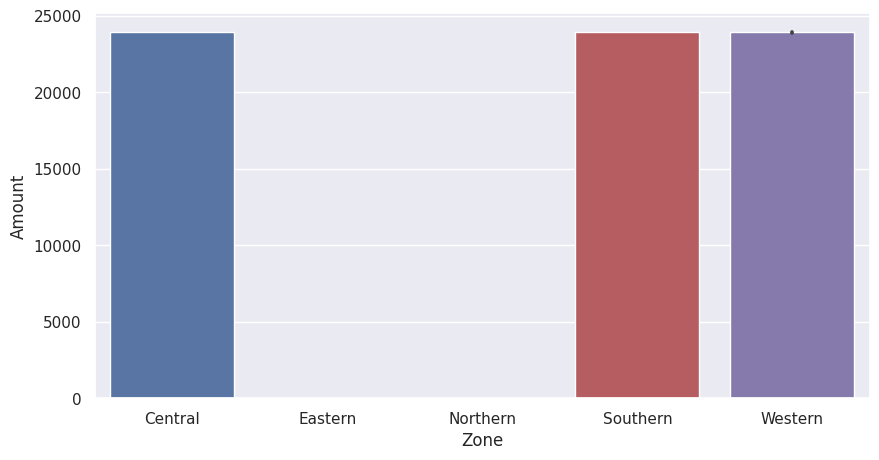

In [33]:
sns.set(rc={"figure.figsize":(10,5)})
sales_Zone=a.groupby(['Zone'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(data=a.head(5),x='Zone',y='Amount')

In [34]:
a['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

Text(0.5, 1.0, 'Order place by Age_Group')

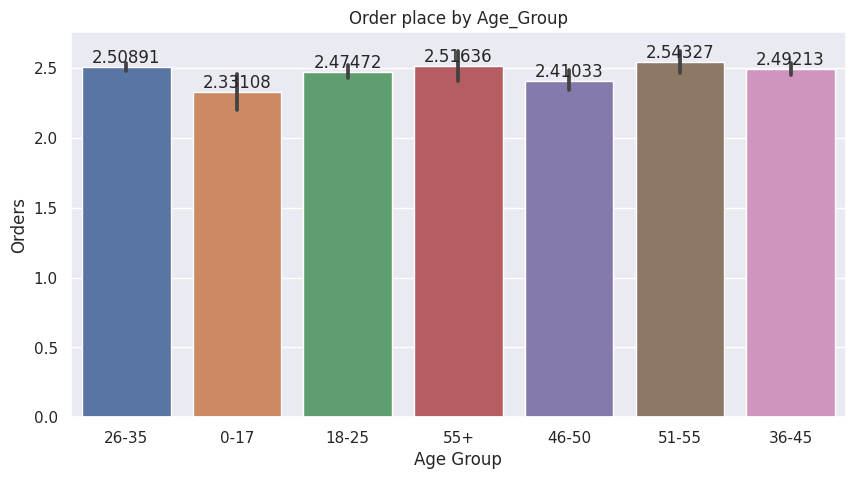

In [35]:
Orders_agegrp=a.groupby(['Age Group'],as_index=False)['Orders'].sum().sort_values('Orders',ascending=False)
ab=sns.barplot(data=a,x='Age Group',y='Orders')
for bars in ab.containers:
    ab.bar_label(bars)
plt.title('Order place by Age_Group')

Find out how many times the a perticular product is order

In [36]:
mk=a['Product_ID']=='P00125942'

In [37]:
mk.value_counts()   # hence their are in total 18 product of 'P00125942' order

Product_ID
False    11233
True        18
Name: count, dtype: int64

<Axes: xlabel='Age Group', ylabel='Age'>

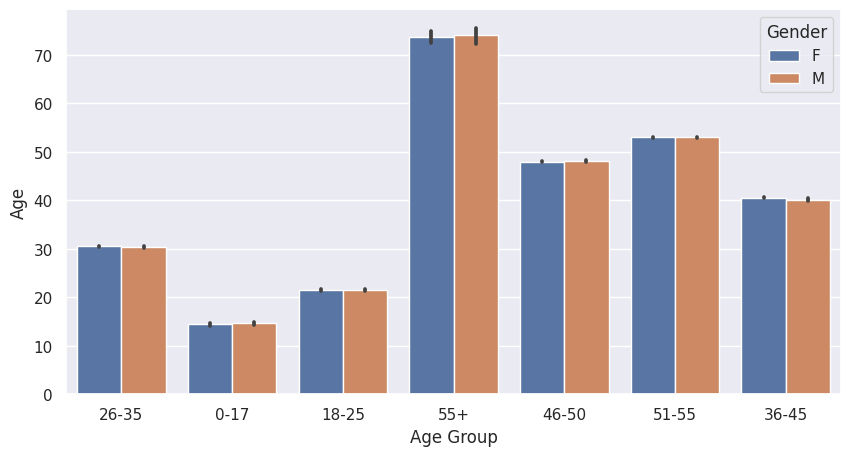

In [38]:
sns.barplot(data=a,x='Age Group',y='Age',hue='Gender')

Text(0.5, 1.0, 'Order place by Age_Group')

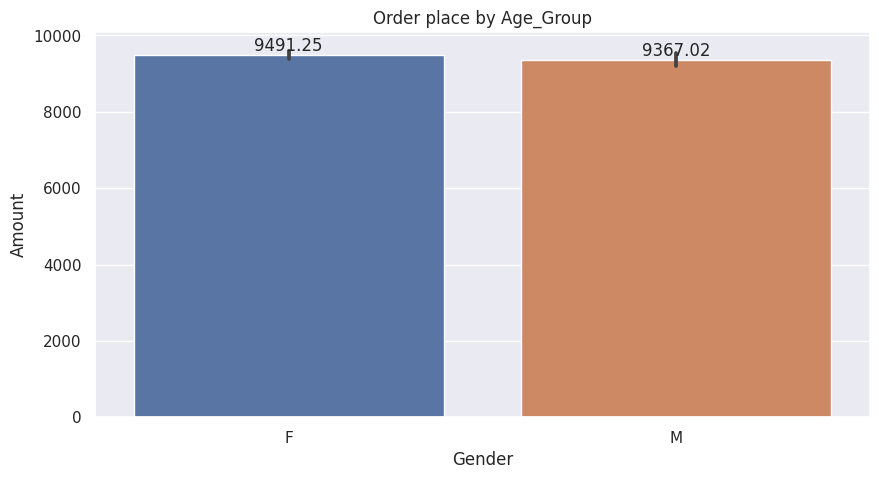

In [39]:
Orders_agegrp=a.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
ab=sns.barplot(data=a,x='Gender',y='Amount')
for bars in ab.containers:
    ab.bar_label(bars)
plt.title('Order place by Age_Group')

Text(0, 0.5, 'Frequency')

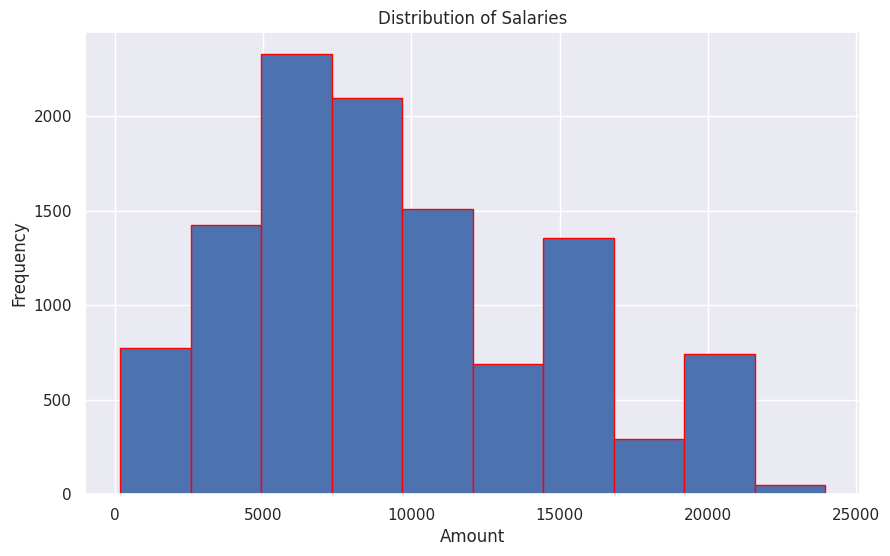

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(a['Amount'],edgecolor='red')
plt.title('Distribution of Salaries')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Order place by Occuption')

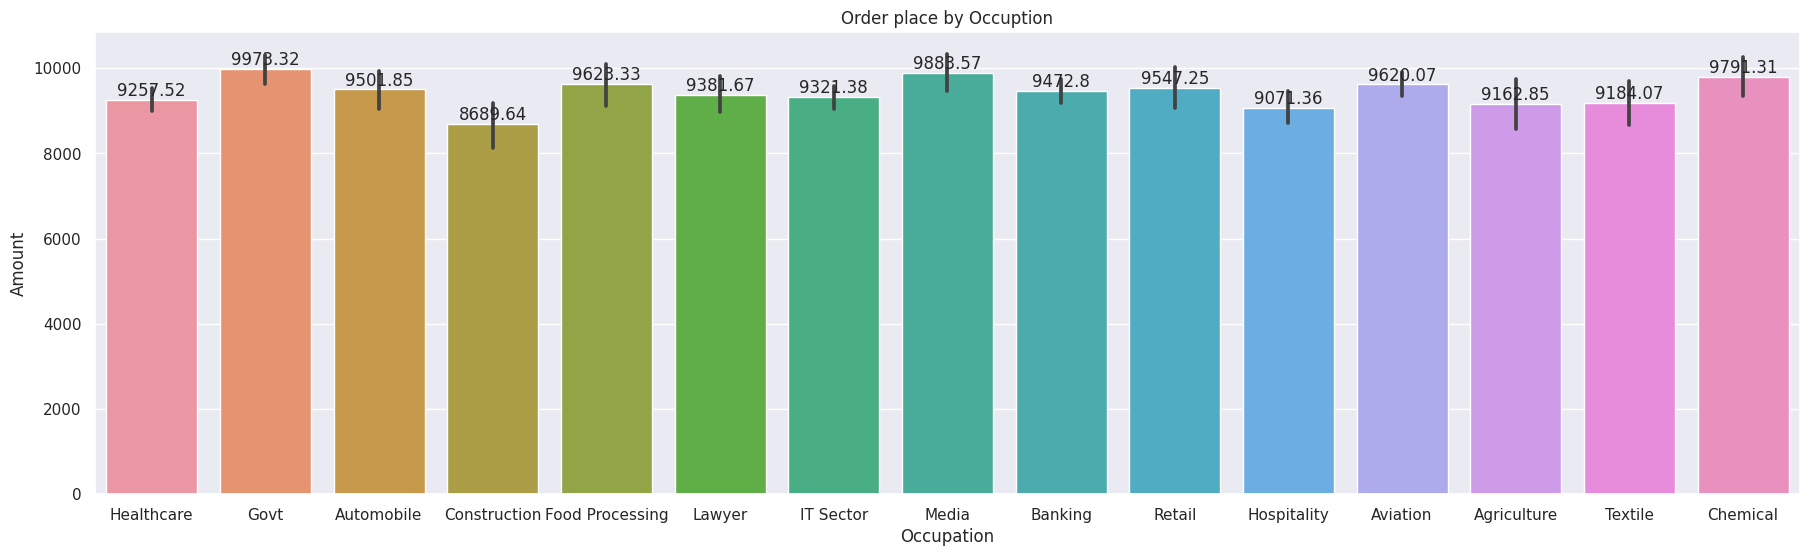

In [41]:
plt.figure(figsize=(22,6))
Orders_agegrp=a.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
ab=sns.barplot(data=a,x='Occupation',y='Amount')
for bars in ab.containers:
    ab.bar_label(bars)
plt.title('Order place by Occuption')

In [42]:
a['State'].nunique()

16

Text(0.5, 1.0, 'Count of order by Product_Category')

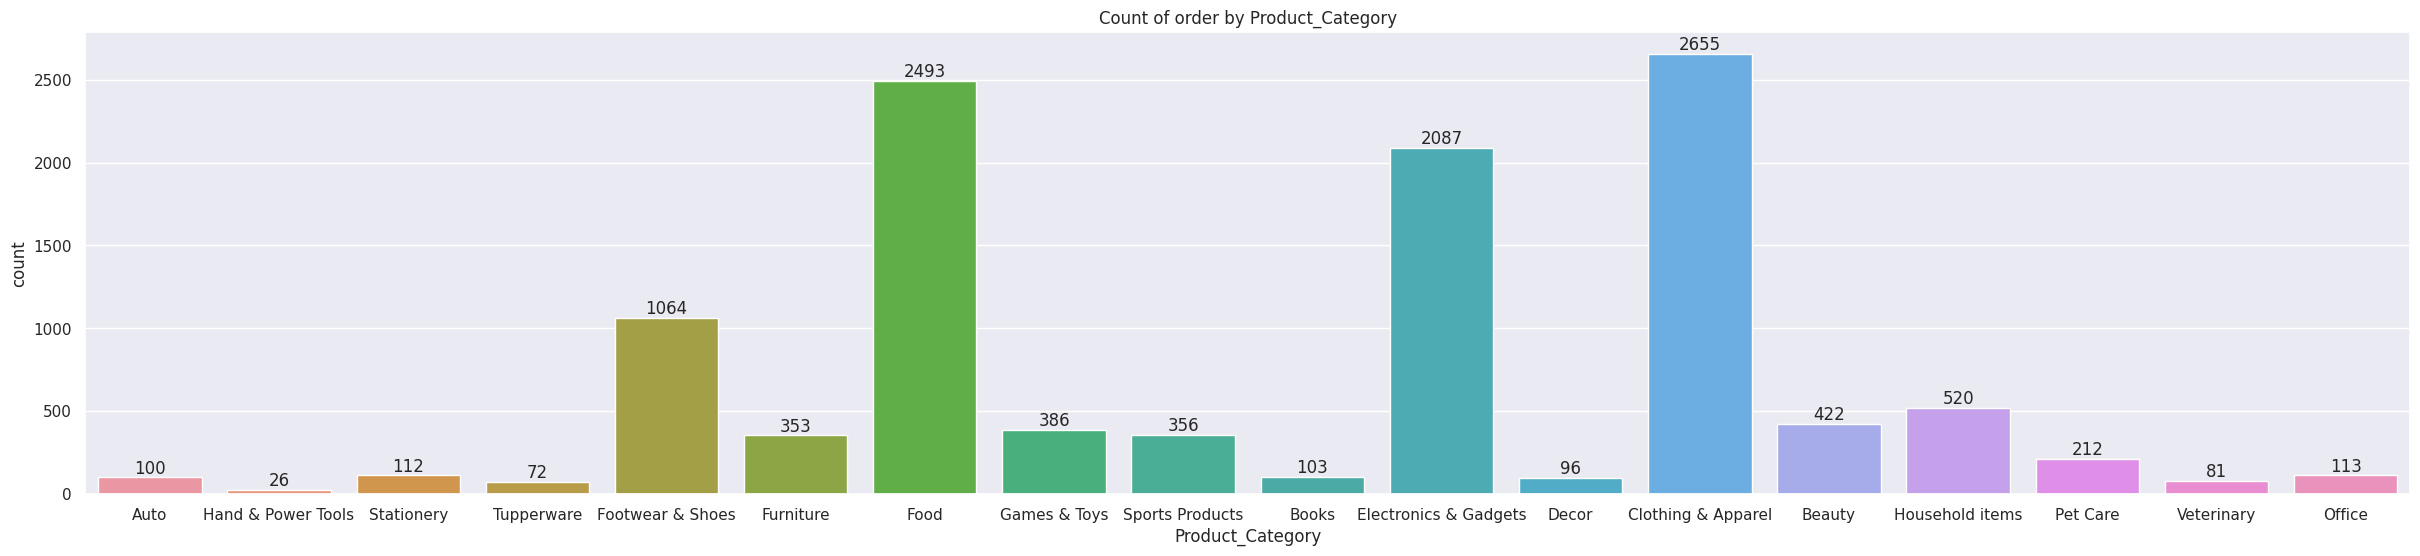

In [43]:
plt.figure(figsize=(30,6))
af=sns.countplot(data=a,x='Product_Category')
for bars in af.containers:
    af.bar_label(bars)
plt.title('Count of order by Product_Category')

Certainly! Here's a summary of the insights derived from the analysis of the Diwali sales dataset:

1. **Data Overview and Cleaning:**
   - The dataset was loaded and inspected for basic information, including data types and missing values. Missing values in the 'Amount' column were replaced with the mean value, and unnecessary columns were dropped.

2. **Data Type Optimization:**
   - Data types were optimized to reduce memory usage by converting categorical columns to the 'category' type and numeric columns to integer type.

3. **Duplicate Values:**
   - Checked for and confirmed the absence of duplicate rows.

4. **Top Customers by Order Amount:**
   - Identified top customers based on the highest order amount.

5. **New Column Creation:**
   - Created a new column 'Status_marriage' based on the 'Marital_Status' column.

6. **Column Manipulation:**
   - Rearranged columns for better organization and clarity.

7. **Ranking:**
   - Ranked the dataset based on the highest order amount.

8. **State-wise Analysis:**
   - Analyzed the number of orders in Maharashtra state.

9. **Visualization:**
   - Visualized various aspects such as marital status by gender, sales by zone, orders by age group, product order frequency, orders by gender, distribution of order amounts, orders by occupation, and count of orders by product category.

Overall, the analysis provided valuable insights into customer behavior, sales patterns across different demographics and locations, and preferences for product categories. These insights can be leveraged to inform marketing strategies, optimize product offerings, and enhance overall business performance during sales events like Diwali.